# FashionMNIST

![gif](assets/embedding.gif)


You should solve the FashionMNIST problems and be able to recognize clothes thanks to AI.

	If necessary you can un-comment the next line and run it to install this notebook depedencies

In [1]:
!pip install torch torchvision numpy matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Transform each image into tensor
transform = transforms.Compose([transforms.ToTensor()])

# Set the training loader
train_data = datasets.FashionMNIST('../data', train=True, download=True, transform=transform)
# Set the testing loader
test_data = datasets.FashionMNIST('../data', train=False, download=True, transform=transform)

# The dataset

 - `train_data` is only for training your model.
 - `test_data`  is only for testing your model.

## Shape

```python
train_data = [
	[image], [label] # 1st example
	[image], [label] # 2nd example
	[image], [label] # 3rd example
	[image], [label] # 4th example
	... # 4th example
]
```

There's 60 000 examples in the train set, and 10 000 in the test set

### Image

An image is 28*28 in black & white 

You can access the first image this way:

```python
image_0 = data[0][0]
```

### Label

A label is an integer between 0 and 9 (included) 

You can access the first label this way:

```python
label_0 = data[0][0]
```

Here is the detail of each label

| Label | Description |
|:-|:-:|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



In [4]:
print("Train len : " + str(len(test_data)))
print("Test len : " + str(len(train_data)))

Train len : 10000
Test len : 60000


In [5]:
print("Image Size: " + str(train_data[0][0].shape))

Image Size: torch.Size([1, 28, 28])


In [6]:
label_dic = {
	0: "T-shirt/top",
	1: "Trouser",
	2 : "Pullover ",
	3 : "Dress ",
	4 : "Coat ",
	5 : "Sandal ",
	6 : "Shirt ",
	7 : "Sneaker ",
	8 : "Bag ",
	9 : "Ankle boot"
}

def plot_one_example(example):
	plt.imshow(example[0].view(28, 28), cmap="gray")
	plt.title("Label class {}: {}".format(example[1], label_dic[example[1]]))
	plt.show()

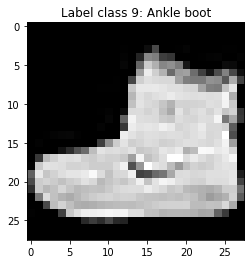

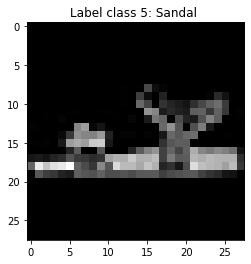

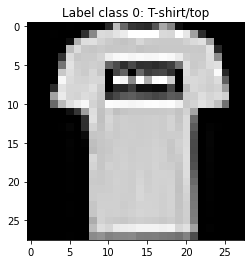

In [7]:
plot_one_example(train_data[0])
plot_one_example(train_data[-1])
plot_one_example(train_data[1])

Time to train a model to predict the label of an image !

The following code simple class for a model with double convolution and three linear

In [8]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5)
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5)
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(4 * 4, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)

        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)

        x = x.reshape(-1, 4 * 4)

        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

Then I load the dataset in a dataloader

In [10]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64)
batch = next(iter(train_loader))
images, labels = batch

Here is the training and testing algorithm

tensor(0.7134, grad_fn=<NllLossBackward>)
tensor(0.6638, grad_fn=<NllLossBackward>)
tensor(0.6385, grad_fn=<NllLossBackward>)
Accuracy: 76.03999999999999 %


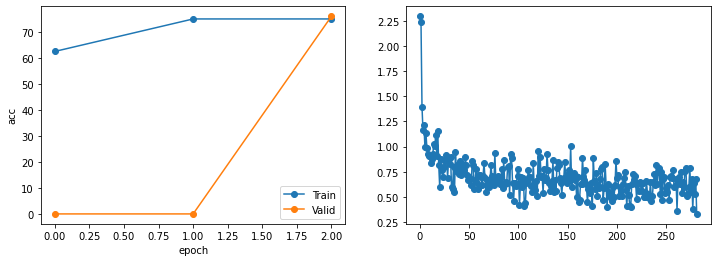

In [25]:
EPOCH = 3

model = MyModel()
loss_fonct = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_accuracies = np.zeros(EPOCH)
train_loss = []
test_accuracies = np.zeros(EPOCH)
count = 0


for epoch in range(EPOCH): #training
    total_train, correct_train = 0, 0
    for batch in train_loader:
        images, labels = batch
        output = model.forward(images)
        loss = loss_fonct(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if count%10 == 0:
            train_loss.append(loss)
        count = count + 1
        
    _, predicted = torch.max(output.data, 1)
    total_train += labels.size(0)
    correct_train += predicted.eq(labels).sum().item()

    train_accuracies[epoch] = correct_train / total_train * 100
    

    print(loss)

total_test, correct_test = 0, 0
for image, label in test_data: #testing
    output = model.forward(image.reshape(1, 1, 28, 28))
    if (output.argmax(dim=1).item() == label):
        correct_test += 1
    total_test += 1

    test_accuracies[epoch] = correct_test / total_test * 100
print("Accuracy:", correct_test / total_test * 100 ,"%")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies,'-o')
plt.plot(test_accuracies,'-o')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train','Valid'])

plt.subplot(1, 2, 2)
plt.plot(train_loss,'-o')
plt.legend

plt.show()